#### Importing Libraries and Modules

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as txt
import seaborn as sns
from scipy import stats
%matplotlib inline

#### Importing data into dataframe and making copies.

In [10]:
laliga=pd.read_csv(r'C:\Users\Saurav Kumar\Desktop\Laliga.csv')
df=laliga.copy()
df.head()

,Name,Position,Total Pass,Accurate Pass,Total Long Balls,Accurate Long Balls,Total Cross,Accurate Cross,Aerial Won,Aerial Lost,...,Total Keeper Sweeper,Accurate Keeper Sweeper,Touches,Total OffSide,Possession Lost Ctrl,Own Goals,MinutesPlayed,place,Team,SofaScore Rating
0,M. t. Stegen,G,22,21,4,3,0,0,0,0,...,0,0,24,0,1,0,90,Home,Barcelona,7.1
1,O. Mingueza,D,66,64,3,3,1,0,0,0,...,0,0,81,0,3,0,90,Home,Barcelona,7.4
2,G. Piqué,D,92,83,10,6,0,0,6,1,...,0,0,98,0,9,0,76,Home,Barcelona,7.2
3,S. Umtiti,D,97,90,4,2,0,0,1,0,...,0,0,104,0,7,0,90,Home,Barcelona,7.3
4,J. Alba,D,59,57,2,2,4,1,0,1,...,0,0,78,0,7,0,76,Home,Barcelona,7.5


#### Kept 'df1' as one more copy if needed ahead during analysis

In [11]:
df1=df.copy()

In [12]:
df.columns

Index(['Name', 'Position', 'Total Pass', 'Accurate Pass', 'Total Long Balls',
       'Accurate Long Balls', 'Total Cross', 'Accurate Cross', 'Aerial Won',
       'Aerial Lost', 'Duel Lost', 'Duel Won', 'Total Dribbles',
       'Successful Dribbles', 'Big Chance Created', 'Big Chance Missed',
       'Interception Won', 'Dribbled Past', 'Dispossessed',
       'Error Lead To Shot', 'Total Tackle', 'Fouls', 'Was Fouled',
       'Total Clearance', 'Key Pass', 'Shots On Target', 'Shots Off Target',
       'Goal Assist', 'Goals', 'Woodwork', 'Saves', 'Punches',
       'Save From Inside The Box', 'Last Man Tackle', 'Shots Blocked',
       'Blocked Shots', 'Total Keeper Sweeper', 'Accurate Keeper Sweeper',
       'Touches', 'Total OffSide', 'Possession Lost Ctrl', 'Own Goals',
       'MinutesPlayed', 'place', 'Team', 'SofaScore Rating'],
      dtype='object')

In [13]:
df.shape

(16570, 46)

 #### Changing column names to lower case

There are two methods here that does the same thing. I have commented the first one and used the second method which is more intutive.

In [14]:
# for col in df.columns:
#     name=col.lower()
#     df[name]=df[col]
#     df.drop(col,inplace=True,axis=1)
    

# for ele in df1.columns:
#     if ele.lower() not in df.columns:
#         print(ele)
        
# df['place']=df1['place']

df.columns=df.columns.str.lower()

### Looking for null values

In [15]:
df.isnull().sum()

name                        0
position                    9
total pass                  0
accurate pass               0
total long balls            0
accurate long balls         0
total cross                 0
accurate cross              0
aerial won                  0
aerial lost                 0
duel lost                   0
duel won                    0
total dribbles              0
successful dribbles         0
big chance created          0
big chance missed           0
interception won            0
dribbled past               0
dispossessed                0
error lead to shot          0
total tackle                0
fouls                       0
was fouled                  0
total clearance             0
key pass                    0
shots on target             0
shots off target            0
goal assist                 0
goals                       0
woodwork                    0
saves                       0
punches                     0
save from inside the box    0
last man t

#### We can see , we only have 9 null values in the dataframe for position column. Lets look at it.

In [16]:
df[df['position'].isnull()][:]

,name,position,total pass,accurate pass,total long balls,accurate long balls,total cross,accurate cross,aerial won,aerial lost,...,total keeper sweeper,accurate keeper sweeper,touches,total offside,possession lost ctrl,own goals,minutesplayed,place,team,sofascore rating
8596,H. Pérez,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Away,Deportivo Alavés,0.0
8597,R. Vallribera,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Away,Deportivo Alavés,0.0
9392,C. Diamanka,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Home,Elche CF,0.0
15203,E. Ortiz,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Home,Deportivo Alavés,0.0
15204,H. Pérez,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Home,Deportivo Alavés,0.0
16161,R. Vallribera,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Home,Deportivo Alavés,0.0
16162,E. Ortiz,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Home,Deportivo Alavés,0.0
16163,H. Pérez,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Home,Deportivo Alavés,0.0
16525,H. Pérez,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Away,Deportivo Alavés,0.0


We can see the all the rows with 'NaN' position values are empty. So, we can remove them without any problem.

In [17]:
print(df.shape)
df.dropna(how='any',axis=0,inplace=True)
print(df.shape)

(16570, 46)
(16561, 46)


## Grouping data by player names

Going ahead we will look at the league's data with players percpective meaning we will analyse the dataset w.r.t. players.

In [60]:
player_grouped=(df.groupby('name').sum()).reset_index()             #Reset_index() will return the dataframe with the serialized index

Adding "Team" and "Position" column to the player_grouped dataframe.

In [19]:
def player_team(val):
    team=list(df[df['name']==val]['team'])[0]
    return team        
    
def position(val):
    pos=list(df[df['name']==val]['position'])[0]
    return pos
    
player_grouped['team']=player_grouped['name'].apply(player_team)
player_grouped['position']=player_grouped['name'].apply(position)


## Now we are going to answer some questions based on the player's data

#### Player having blocked most shots.

In [20]:
max_blocked=player_grouped['blocked shots'].max()
player_grouped[player_grouped['blocked shots']==max_blocked][['name','team','blocked shots','position']]

,name,team,blocked shots,position
208,G. Verdú,Elche CF,30,D


#### Now, we want to know how many shots 'G Verdu' blocked on AWAY turfs.

In [21]:
df[(df['name']=='G. Verdú') & (df['place']=='Away')][['blocked shots']].sum()

blocked shots    18
dtype: int64

#### Which player won most aerial challenges.

In [22]:
max_aerial=player_grouped['aerial won'].max()
player_grouped[(player_grouped['aerial won']==max_aerial)][['name','team','aerial won']]

,name,team,aerial won
337,Joselu,Deportivo Alavés,257


#### Now we want to know which player had more aerial won in AWAY matches

In [23]:
players_away=df[df['place']=='Away'].groupby('name').sum().reset_index()
players_away[players_away['aerial won']==players_away['aerial won'].max()][['name','aerial won']]

,name,aerial won
330,Joselu,120


#### Top 10 successful dribblers in laliga 2020/2021

In [24]:
player_grouped.sort_values(by='successful dribbles',ascending=False)[['name','successful dribbles','team']][0:10]

,name,successful dribbles,team
371,L. Messi,160,Barcelona
273,J. Galán,121,Huesca
445,N. Fekir,85,Real Betis Balompié
200,G. Moreno,71,Villarreal
66,B. Gil,67,Eibar
375,L. Ocampos,67,Sevilla
195,G. Guedes,66,Valencia
634,Y. Carrasco,66,Atlético Madrid
363,L. Boyé,66,Elche CF
47,A. Perea,63,Cádiz


In [62]:
''' Creating 'team_stats' dataframe by grouping them w.r.t teams just like we did when creating 'players_grouped' dataframe '''

team_stats=df.groupby(['team']).sum().reset_index()
team_stats

,team,total pass,accurate pass,total long balls,accurate long balls,total cross,accurate cross,aerial won,aerial lost,duel lost,...,shots blocked,blocked shots,total keeper sweeper,accurate keeper sweeper,touches,total offside,possession lost ctrl,own goals,minutesplayed,sofascore rating
0,Athletic Bilbao,15823,12414,2393,1220,812,151,680,615,1933,...,93,74,14,13,22709,77,5336,1,37640,3995.7
1,Atlético Madrid,19122,15886,2154,1109,597,140,547,505,1828,...,88,83,7,7,25959,96,5033,3,37682,3886.9
2,Barcelona,27064,24269,1493,922,494,121,403,326,1546,...,133,70,12,11,33607,90,4427,2,37647,4024.2
3,Celta Vigo,17812,14238,2295,1029,521,103,628,687,2200,...,75,89,18,17,24552,65,5180,1,37671,3689.0
4,Cádiz,10469,7201,2504,1031,731,134,704,776,1998,...,43,99,10,10,17259,56,5217,1,37627,3913.0
5,Deportivo Alavés,12754,9293,2414,1111,645,176,858,617,1915,...,92,90,13,13,19365,73,5249,0,37555,3785.5
6,Eibar,14656,10647,3153,1450,1052,228,928,942,2211,...,102,63,24,23,22047,67,6300,0,37703,3749.1
7,Elche CF,15448,12587,2315,1150,672,151,500,553,2009,...,59,97,12,12,22268,51,4843,1,37553,3703.3
8,Getafe,11950,7948,2761,1079,817,182,866,971,2488,...,88,53,13,12,19060,74,6117,3,37615,3601.2
9,Granada,11693,8181,2530,1004,613,119,695,870,2185,...,82,128,25,23,18452,82,5367,1,37604,3910.5


#### Which team faced more shots due to the error.

In [26]:
team_stats.sort_values(by='error lead to shot',ascending=False)[['team','error lead to shot']][0:5]

,team,error lead to shot
19,Villarreal,12
14,Real Madrid,11
2,Barcelona,9
11,Levante,9
7,Elche CF,8


#### Which team has least shots off target

In [27]:
team_stats.sort_values(by=['shots off target','shots on target'],ascending=[True,False])[['team','shots on target','shots off target']].iloc[0,:]

team                Elche CF
shots on target           90
shots off target         119
Name: 7, dtype: object

#### TOP 5 players who played the most minutes

In [28]:
player_grouped['position']=player_grouped['name'].apply(position)
player_grouped.sort_values(by='minutesplayed',ascending=False)[['name','team','minutesplayed']].head(5)


,name,team,minutesplayed
138,D. Suárez,Celta Vigo,5308
411,M. Gómez,Villarreal,5272
117,D. García,Osasuna,5071
513,R. García,Osasuna,4981
20,A. Fernández,Levante,4425


Above we can see 'D. Suarez' has played most minutes in laliga 2020/21 but doesn't it seems odd to you beacause maximun minutes a player can play in a season will be 
#### (total matches(38) * max mins in a single match(90)) = 3420. 
So, where we have gone wrong. Is it the scraped data or grouping gone wrong somewhere. Lets look at it.

In [29]:
'''We will analyse all the records with the name 'D Suarez' '''

df[df['name']=='D. Suárez']

'''In the records below you can see that the player 'D. Suárez' belongs to two different teams and when we grouped the data ,
   it binds both the name beacause of their similarities. So, we need to group the data by player name and the team'''

"In the records below you can see that the player 'D. Suárez' belongs to two different teams and when we grouped the data ,\n   it binds both the name beacause of their similarities. So, we need to group the data by player name and the team"

### So, going ahead we will now use player_grouped_team dataframe where we need to analyse the data based on the players.

There is one advantage of grouping with 'team' column along with players 'name' that 'team' column will already be available in the dataframe so we don't need to add it seperately like we did before when we created 'player_grouped' dataframe. However, we need to add the 'position' column which can be added using the function created above. 

In [30]:
player_grouped_team=(df.groupby(['name','team']).sum()).reset_index()
player_grouped_team['position']=player_grouped_team['name'].apply(position)
player_grouped_team.sort_values(by='minutesplayed',ascending=False)[['name','team','minutesplayed','position']].head(5)


,name,team,minutesplayed,position
698,Á. Remiro,Real Sociedad,3420,G
328,J. Oblak,Atlético Madrid,3420,G
624,T. Courtois,Real Madrid,3420,G
183,F. Pacheco,Deportivo Alavés,3348,G
647,U. Simón,Athletic Bilbao,3330,G


Now, we got correct result set for top 5 players who played most minutes in laliga 20/21 and you can see they are all goal keepers.

#### Player who played most minutes from every team in Laliga.

In [31]:
from IPython.display import clear_output
import time
for x in df['team'].unique():
    clear_output(wait=True)
    player=player_grouped_team[player_grouped_team['team']==x][['team','name','minutesplayed']].sort_values(by='minutesplayed',ascending=False).head(1)
    print(player)
    time.sleep(2)

       team          name  minutesplayed
423  Getafe  M. Cucurella           3248


#### Which Player has been fouled most

In [32]:
player_grouped_team.sort_values(by='was fouled',ascending=False)[['name','was fouled']].head(5)

,name,was fouled
391,L. Messi,99
289,J. Galán,97
470,N. Fekir,93
364,K. García,92
395,L. Ocampos,76


'Lionel Messi' had been fouled most followed by 'J. Galan'. You can also observe that these top 5 players are also in the top 10 successful dribblers. So, it is safe to say that players with good dribbling rate will attract most fouls by opposition team. An interesting insight.

### Which team has highest dispossed rate 

In [33]:
x=team_stats.groupby('team').sum().reset_index().sort_values(by='dispossessed',ascending=False)[['team','dispossessed']].head(5).eval('dispossessed_rate=dispossessed/38')

# x.eval('dispossessed_rate=dispossessed/38',inplace=True)

'''You can also use pd.eval() seperately on the dataframe to derive a new column same as I have done above'''

x

,team,dispossessed,dispossessed_rate
13,Real Betis Balompié,367,9.657895
8,Getafe,354,9.315789
9,Granada,346,9.105263
7,Elche CF,345,9.078947
1,Atlético Madrid,342,9.000000


####  we can see Real Betis has highest dispossessed rate which means on an average this team gets dispossessed more than 9.5 times in every match.

## TOP 3 goal keepers having most saves

In [34]:
player_grouped_team[player_grouped_team['position']=='G'].sort_values(by='saves',ascending=False)[['name','team','saves']].head(3)

,name,team,saves
328,J. Oblak,Atlético Madrid,103
155,E. Badia,Elche CF,95
624,T. Courtois,Real Madrid,90


### Adding a new column 'ga'

New column 'ga' will be the sum of column 'goal' and 'assist'. This will help us visualize the distribution of the feature 'ga' in the data.

In [35]:
player_grouped_team['assist']=player_grouped_team['goal assist']
player_grouped_team.eval('ga=goals+assist',inplace=True)
player_grouped_team

,name,team,total pass,accurate pass,total long balls,accurate long balls,total cross,accurate cross,aerial won,aerial lost,...,accurate keeper sweeper,touches,total offside,possession lost ctrl,own goals,minutesplayed,sofascore rating,position,assist,ga
0,A. Abqar,Deportivo Alavés,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,D,0,0
1,A. Akurugu,Getafe,10,7,1,0,1,0,0,0,...,0,19,0,6,0,45,6.2,D,0,0
2,A. Arambarri,Real Sociedad,15,12,1,0,0,0,1,1,...,0,24,0,8,0,25,6.1,D,0,0
3,A. Aranda,Granada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,M,0,0
4,A. Arbilla,Eibar,1697,1286,448,218,43,10,68,54,...,0,2298,0,513,0,2823,230.8,D,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Ó. Plano,Real Valladolid,783,593,57,26,33,7,54,67,...,0,1267,3,317,0,2529,246.8,M,5,10
709,Ó. Rodríguez,Sevilla,296,248,20,13,38,8,7,7,...,0,439,0,111,0,529,134.2,M,0,0
710,Ó. Torres,Sevilla,966,834,158,116,38,11,3,13,...,0,1253,0,231,0,1412,217.9,M,3,3
711,Ó. d. Marcos,Athletic Bilbao,595,459,62,25,58,6,13,14,...,0,935,2,237,0,1520,167.3,D,2,3


#### Now Plotting the feature 'ga' using KDE plot function from seaborn. This basically tell us the how the 'ga' numbers are spread across the league.  

<AxesSubplot:xlabel='ga', ylabel='Density'>

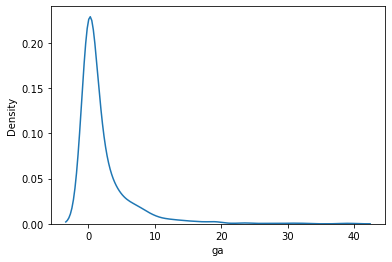

In [36]:
sns.kdeplot(data=player_grouped_team,x='ga')

We can see that most of the feature values lie between 0 to 10 which means there are higher chances that a player in this league will have 'ga' in between 0 to 10.

#### Distribution fitting

Ahead we will be analysing 'goals' feature based on the pdf and cdf calculated through stats module of scipy library.

In [37]:
goals=player_grouped_team['goals'].sort_values(ascending=False)

In [38]:
''' loc here represents "mean" and scale represents "Standard deviation" of the feature used.'''

loc,scale=stats.norm.fit(goals)        
loc,scale

(1.2945301542777, 2.9560000710755596)

In [39]:
'''Calculating Probablity density function for the feature and then plotting it to understand which number takes the highest pdf'''

pdf=stats.norm.pdf(goals,loc=loc,scale=scale)


([<matplotlib.axis.XTick at 0x25930093bc8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

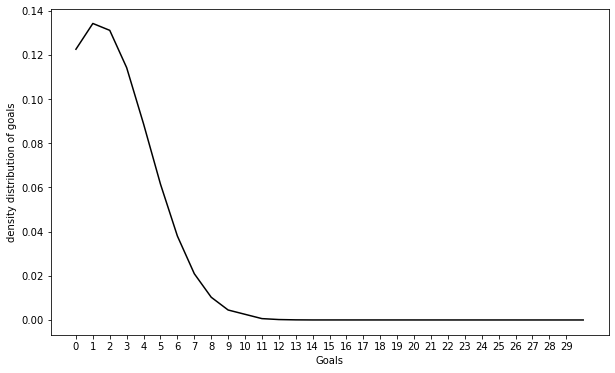

In [40]:
plt.figure(figsize=(10,6))
plt.plot(goals,pdf,color='black')
plt.xlabel('Goals')
plt.ylabel('density distribution of goals')
plt.xticks(np.arange(0,30,1))

#### PDF tells us the likelihood of a value being assumed by the the feature. For eg , By looking at the figure above we can tell that there are higher chances for a player to have 1 or 2 goals than 9 or 10. 

In [41]:
'''Calculating CDF for the feature and plotting it'''

cdf=stats.norm.cdf(goals,loc=loc,scale=scale)

Text(23, 0.7, 'Messi')

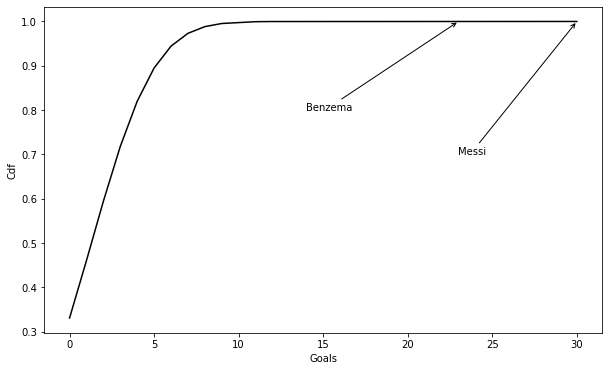

In [42]:
fig,ax=plt.subplots(figsize=(10,6))
plt.plot(goals,cdf,color='black')
plt.xlabel('Goals')
plt.ylabel('Cdf')

benzema=player_grouped_team[player_grouped_team['name']=='K. Benzema']['goals']
cdf_benzema=stats.norm.cdf(benzema,loc=loc,scale=scale)

messi=player_grouped_team[player_grouped_team['name']=='L. Messi']['goals']
cdf_messi=stats.norm.cdf(messi,loc=loc,scale=scale)

# txt.Annotation('Benzema',xy=(benzema,cdf_benzema),xytext=(benzema,0.8),arrowprops={'arrowstyle':'->'},xycoords=(0,30))
ax.annotate('Benzema',xy=(benzema,cdf_benzema),xytext=(14,0.8),
            arrowprops={'arrowstyle':'->'}
            )

ax.annotate('Messi',xy=(messi,cdf_messi),xytext=(23,0.7),
            arrowprops={'arrowstyle':'->'}
            )

### CDF basically tells the probablity of variable taking a specific value or value below it. For eg , what is the probablity that 'Goals' will take the value 5 or below 5.

In [43]:
goals_5=stats.norm.cdf(5,loc=loc,scale=scale)
goals_5

0.8949957136646638

#### so the above calculation tells us that the 'Goals' will take the value 5 or values below 5 with the probablity of 89.59%. 
So, what are the chances that 'Goals' will take value 20 or below it.

In [44]:
goals_20=stats.norm.cdf(20,loc=loc,scale=scale)
goals_20

0.9999999998757936

So 'goals_20' tell us that 'goals' variable will assume value 20 or below it with 99.99 % probablity. It can also be said in this way that 'goals' will have 99.99% of their values below 20.

#### If you want to find the probablity for the variable 'goals' to take the value above 20, you just need to substract the 'goals_20' with 1.
That gives us the probablity of 0.01% which means there is 0.01 chances for a player to score more than 20 goals.

#### How many players have goals above 10.

In [45]:
players_10=player_grouped_team[player_grouped_team['goals']>10]['goals'].count()
players_10

19

To calculate the percentage of players having goal above 10 we need to divide it by total numbers of players that played in the league. 

In [46]:
length=len(player_grouped_team)
print(f"Percentage of players that scored goals above 10 is {round(players_10/length*100,2)} %")

Percentage of players that scored goals above 10 is 2.66 %


Now , I'm going to create a dataframe which contains two rows for each player, where each row contains stats corresponding to where they played, 'home' or 'away'.

In [47]:
place_stats=df.groupby(['name','place']).sum().reset_index()
place_stats.columns

Index(['name', 'place', 'total pass', 'accurate pass', 'total long balls',
       'accurate long balls', 'total cross', 'accurate cross', 'aerial won',
       'aerial lost', 'duel lost', 'duel won', 'total dribbles',
       'successful dribbles', 'big chance created', 'big chance missed',
       'interception won', 'dribbled past', 'dispossessed',
       'error lead to shot', 'total tackle', 'fouls', 'was fouled',
       'total clearance', 'key pass', 'shots on target', 'shots off target',
       'goal assist', 'goals', 'woodwork', 'saves', 'punches',
       'save from inside the box', 'last man tackle', 'shots blocked',
       'blocked shots', 'total keeper sweeper', 'accurate keeper sweeper',
       'touches', 'total offside', 'possession lost ctrl', 'own goals',
       'minutesplayed', 'sofascore rating'],
      dtype='object')

<AxesSubplot:xlabel='big chance created', ylabel='accurate pass'>

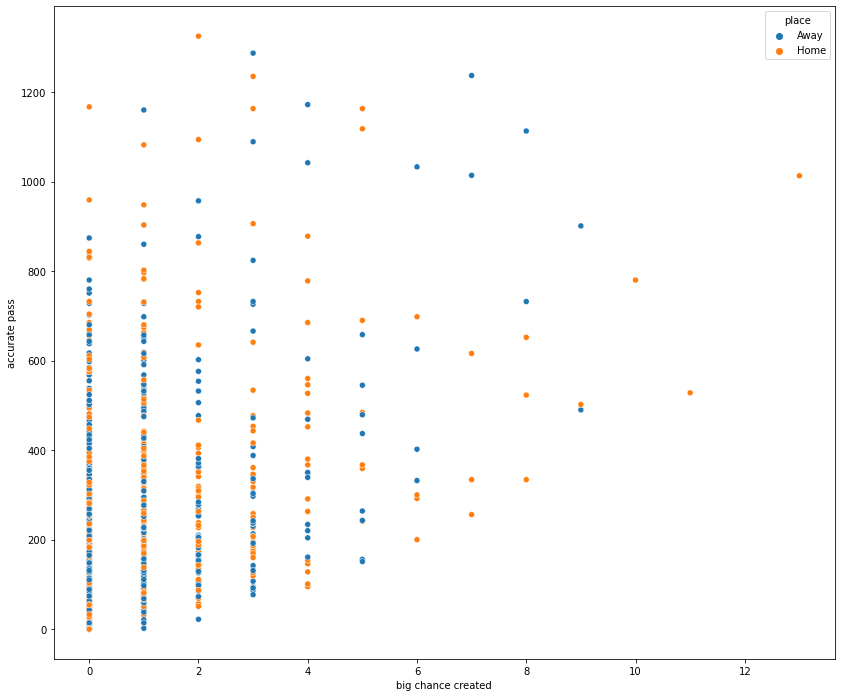

In [48]:
fig,ax=plt.subplots(figsize=(14,12))
sns.scatterplot(data=place_stats,x='big chance created',y='accurate pass',ax=ax,hue='place')


#### Above we have plotted column "big chance created" and "accurate pass" and we see there are few players who have performed exceptionally in both areas. So, we can annotate those points to see the players that act as outliers to this data.

In order to extract these players out of the 'place_stats' dataframe, we will set the conditions on both the columns.

In [49]:
players=place_stats[(place_stats['big chance created']>6) & (place_stats['accurate pass']>400)][['name','accurate pass','big chance created']].sort_values(by='big chance created',ascending=False).set_index('name').to_dict()

Annotating

Text(13.2, 1008, 'L. Messi')

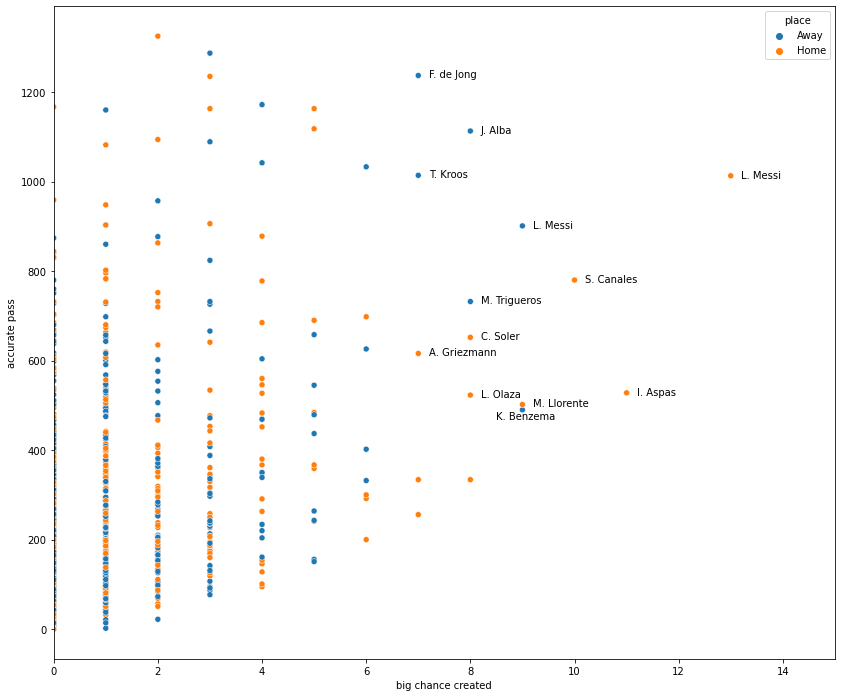

In [50]:
fig,ax=plt.subplots(figsize=(14,12))
sns.scatterplot(data=place_stats,x='big chance created',y='accurate pass',ax=ax,hue='place')
players=place_stats[(place_stats['big chance created']>6) & (place_stats['accurate pass']>400)][['name','accurate pass','big chance created']].sort_values(by='big chance created',ascending=False).set_index('name').to_dict()

plt.xlim(0,15)

for x in players.get('accurate pass').keys():
    point_x=players.get('big chance created').get(x)
    point_y=players.get('accurate pass').get(x)
    # ax.annotate(x,xy=(point_x,point_y),xytext=(x_set,y_set),arrowprops={'arrowstyle':'->'})
    if x =='K. Benzema':
        ax.annotate(x,xy=(point_x,point_y),xytext=(point_x-0.5,point_y-20))
    else:
        ax.annotate(x,xy=(point_x,point_y),xytext=(point_x+0.2,point_y-5))
ax.annotate('L. Messi',xy=(13,1013),xytext=(13.2,1008))

### You can see that on home soil L.Messi has more than 12 'Big Chance Created' and has accurate passes above 1000.

To better analyze which players were instrumental in their team performance. We could also plot 'key passes' v 'big chance created'. Have a look at it.

(0.0, 55.0)

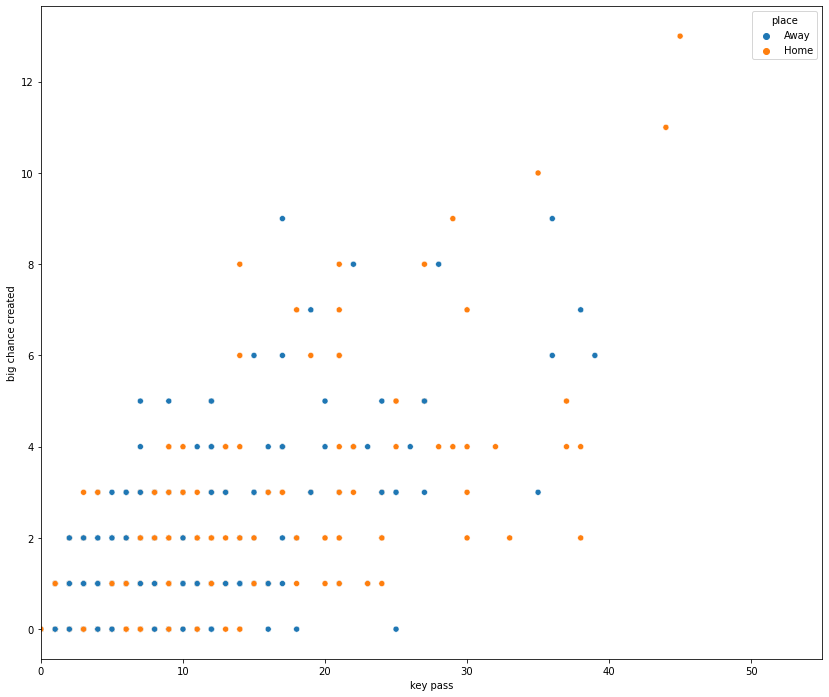

In [51]:
fig,ax=plt.subplots(figsize=(14,12))
sns.scatterplot(data=place_stats,x='key pass',y='big chance created',ax=ax,hue='place')
plt.xlim(0,55)

Annotating

Text(45, 12.7, 'L. Messi')

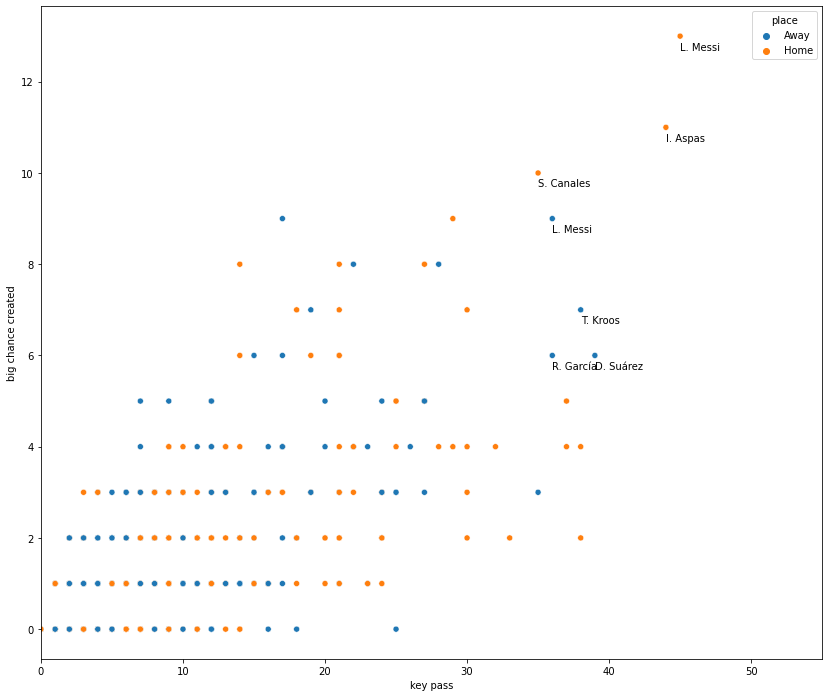

In [52]:
fig,ax=plt.subplots(figsize=(14,12))
sns.scatterplot(data=place_stats,x='key pass',y='big chance created',ax=ax,hue='place')
plt.xlim(0,55)
players=place_stats[(place_stats['big chance created']>=6) & (place_stats['key pass']>34)][['name','key pass','big chance created']].sort_values(by='key pass',ascending=False).set_index('name').to_dict()
# players


for x in players.get('key pass').keys():
    point_x=players.get('key pass').get(x)
    point_y=players.get('big chance created').get(x)
    # ax.annotate(x,xy=(point_x,point_y),xytext=(x_set,y_set),arrowprops={'arrowstyle':'->'})
    ax.annotate(x,xy=(point_x,point_y),xytext=(point_x,point_y-0.3))

ax.annotate('L. Messi',xy=(45,13),xytext=(45,12.7))

#### It can be easily identified that both I. Aaspas and L. Messi has peformed very well in these key areas and were instrumental in their team performances but we have a problem here.

Like previously, When we grouped the data on column 'name' we unknowingly summed up the data for the players having smiliar names. This time, we have done the same thing.To fix this, We need to add 'team' in the group by clause.

### Now we would want to analyse the better player at every position. 

#### 'position' column have 4 unique values. 'G' for goalkeepers , 'D' for defender,'M' for midfielders, 'F' for forward. 

Lets plot two traits of a mid-fielder and see who performed best among all of them.

In [55]:
midfielders=df[df['position']=='M'].groupby(['name','team']).sum().reset_index()
midfielders

,name,team,total pass,accurate pass,total long balls,accurate long balls,total cross,accurate cross,aerial won,aerial lost,...,shots blocked,blocked shots,total keeper sweeper,accurate keeper sweeper,touches,total offside,possession lost ctrl,own goals,minutesplayed,sofascore rating
0,A. Aranda,Granada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,A. Baena,Villarreal,51,43,2,1,4,0,0,2,...,0,1,0,0,82,0,17,0,136,26.9
2,A. Blanco,Real Madrid,167,156,6,4,2,1,0,5,...,1,2,0,0,206,0,15,0,218,27.8
3,A. Blesa,Levante,12,12,0,0,0,0,0,0,...,0,0,0,0,12,0,0,0,10,6.4
4,A. Diaby,Getafe,8,5,0,0,2,0,0,1,...,0,0,0,0,19,0,8,0,17,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Ó. Castro,Atlético Madrid,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
248,Ó. Plano,Real Valladolid,783,593,57,26,33,7,54,67,...,7,6,0,0,1267,3,317,0,2529,246.8
249,Ó. Rodríguez,Sevilla,296,248,20,13,38,8,7,7,...,2,0,0,0,439,0,111,0,529,134.2
250,Ó. Torres,Sevilla,966,834,158,116,38,11,3,13,...,2,0,0,0,1253,0,231,0,1412,217.9


In [56]:
midfielders.columns

Index(['name', 'team', 'total pass', 'accurate pass', 'total long balls',
       'accurate long balls', 'total cross', 'accurate cross', 'aerial won',
       'aerial lost', 'duel lost', 'duel won', 'total dribbles',
       'successful dribbles', 'big chance created', 'big chance missed',
       'interception won', 'dribbled past', 'dispossessed',
       'error lead to shot', 'total tackle', 'fouls', 'was fouled',
       'total clearance', 'key pass', 'shots on target', 'shots off target',
       'goal assist', 'goals', 'woodwork', 'saves', 'punches',
       'save from inside the box', 'last man tackle', 'shots blocked',
       'blocked shots', 'total keeper sweeper', 'accurate keeper sweeper',
       'touches', 'total offside', 'possession lost ctrl', 'own goals',
       'minutesplayed', 'sofascore rating'],
      dtype='object')

Lets plot 'goal assist' v 'key passes'

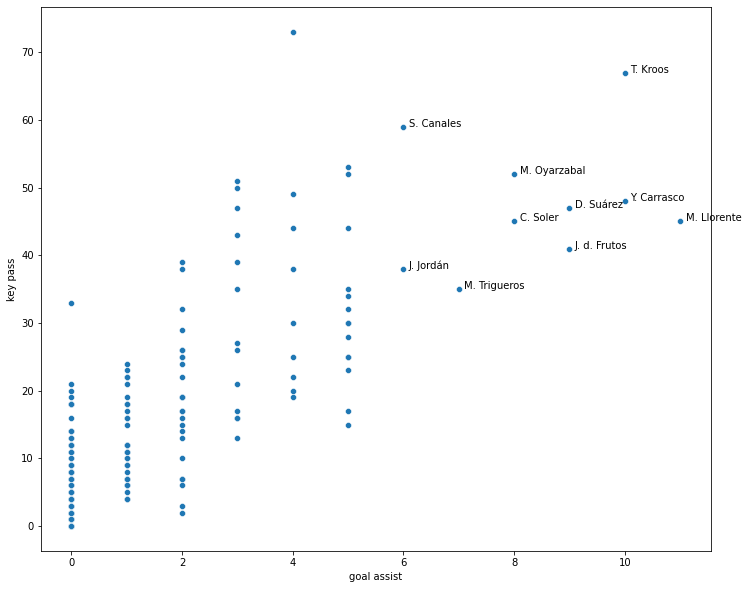

In [58]:
fig,ax=plt.subplots(figsize=(12,10))
sns.scatterplot(data=midfielders,x='goal assist',y='key pass')

for x in midfielders[(midfielders['goal assist']>=6) & (midfielders['key pass']>30)]['name']:
    point_x=midfielders[midfielders['name']==x]['goal assist']
    point_y=midfielders[midfielders['name']==x]['key pass']
    ax.annotate(x,xy=(point_x,point_y),xytext=(point_x+0.1,point_y))

### You can see the players that have performed very well. M. Llorente has most assists in midfielders and T.Kross has balanced numbers in both the key areas.

#### Same can be acheived for players at different positions.

#### Team having highest rating overall in Laliga 2020/21

In [63]:
'''We will be using hue parameter to differentiate between the data at home and Away but we have not added 'place' column in team_stats dataframe
   which will help us acheiving this task. Creating a dataframe grouping by 'team' and 'place'.
'''
team_stats_place=df.groupby(['team','place']).sum().reset_index()
# figure=plt.figure(figsize=(25,8))
# sns.lineplot(data=team_stats_place,x='team',y='woodwork',ci=None,hue='place')

In [64]:
'''Changing the name of the column 'SofaScore rating' in order to make way for the pd.eval() function to take that column as argument and also dropping the previous column'''

print(team_stats_place.shape)
team_stats_place['sofascorerating']=team_stats_place['sofascore rating']
print(team_stats_place.shape)
team_stats_place.drop('sofascore rating',axis=1,inplace=True)
print(team_stats_place.shape)



(40, 44)
(40, 45)
(40, 44)


In [65]:
team_stats_place.eval('avgsrating=sofascorerating/19',inplace=True)
team_stats_place

,team,place,total pass,accurate pass,total long balls,accurate long balls,total cross,accurate cross,aerial won,aerial lost,...,blocked shots,total keeper sweeper,accurate keeper sweeper,touches,total offside,possession lost ctrl,own goals,minutesplayed,sofascorerating,avgsrating
0,Athletic Bilbao,Away,7854,6092,1285,629,414,72,356,306,...,30,10,10,11173,38,2695,0,18801,1989.7,104.721053
1,Athletic Bilbao,Home,7969,6322,1108,591,398,79,324,309,...,44,4,3,11536,39,2641,1,18839,2006.0,105.578947
2,Atlético Madrid,Away,9399,7727,1100,548,309,71,298,269,...,37,7,7,12879,48,2610,2,18840,1913.5,100.710526
3,Atlético Madrid,Home,9723,8159,1054,561,288,69,249,236,...,46,0,0,13080,48,2423,1,18842,1973.4,103.863158
4,Barcelona,Away,13316,11902,788,462,218,56,189,140,...,40,7,6,16541,44,2195,0,18803,1998.5,105.184211
5,Barcelona,Home,13748,12367,705,460,276,65,214,186,...,30,5,5,17066,46,2232,2,18844,2025.7,106.615789
6,Celta Vigo,Away,8507,6681,1180,506,282,42,338,354,...,41,9,8,11892,32,2642,0,18785,1790.5,94.236842
7,Celta Vigo,Home,9305,7557,1115,523,239,61,290,333,...,48,9,9,12660,33,2538,1,18886,1898.5,99.921053
8,Cádiz,Away,5002,3355,1327,534,364,63,352,396,...,54,5,5,8375,28,2622,0,18750,1951.4,102.705263
9,Cádiz,Home,5467,3846,1177,497,367,71,352,380,...,45,5,5,8884,28,2595,1,18877,1961.6,103.242105


<AxesSubplot:xlabel='team', ylabel='avgsrating'>

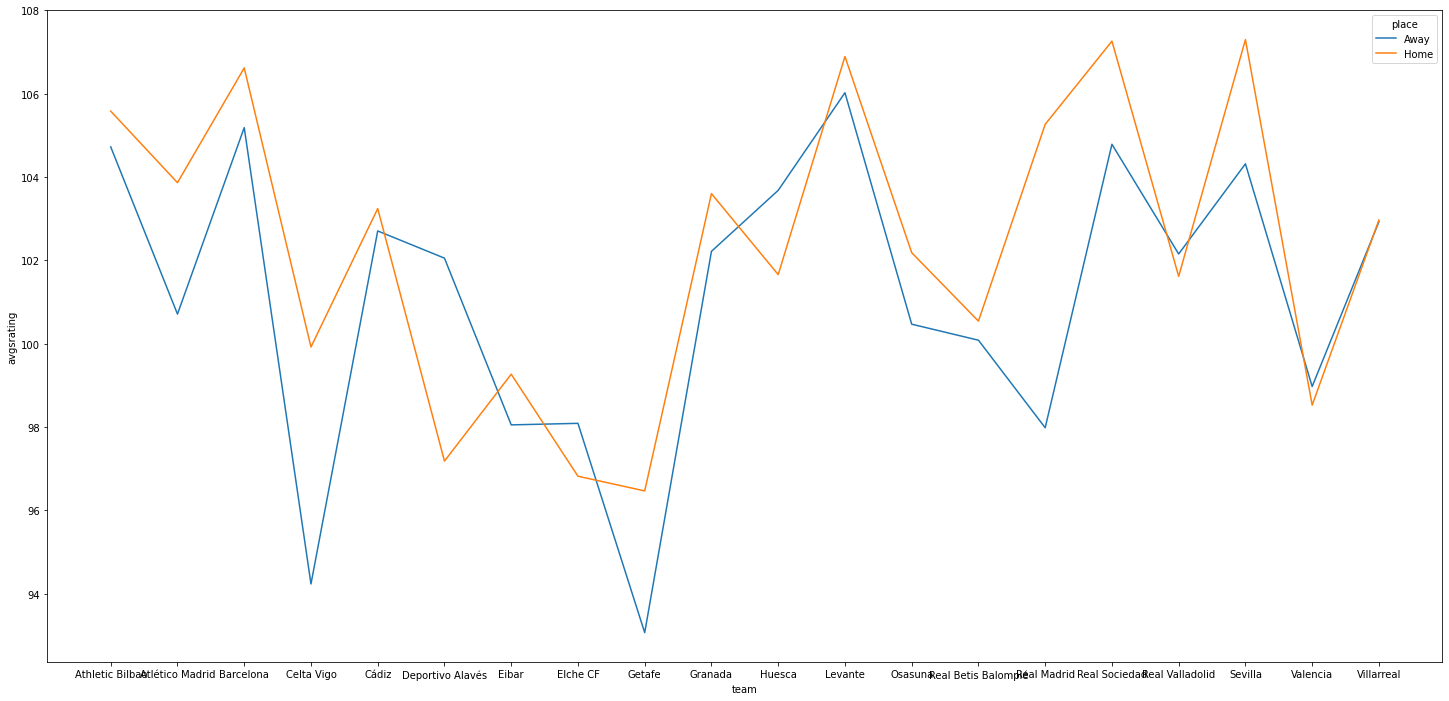

In [66]:
fig=plt.figure(figsize=(25,12))
sns.lineplot(data=team_stats_place,x='team',y='avgsrating',ci=None,hue='place')

#### Getafe has lowest Home and Away avg rating followed by elche who played better at away and second worst at home. Villareal has played almost equal at both the places while real madrid has highest difference between home and away rating.

In [ ]:
player_grouped_team.columns

Index(['name', 'team', 'total pass', 'accurate pass', 'total long balls',
       'accurate long balls', 'total cross', 'accurate cross', 'aerial won',
       'aerial lost', 'duel lost', 'duel won', 'total dribbles',
       'successful dribbles', 'big chance created', 'big chance missed',
       'interception won', 'dribbled past', 'dispossessed',
       'error lead to shot', 'total tackle', 'fouls', 'was fouled',
       'total clearance', 'key pass', 'shots on target', 'shots off target',
       'goal assist', 'goals', 'woodwork', 'saves', 'punches',
       'save from inside the box', 'last man tackle', 'shots blocked',
       'blocked shots', 'total keeper sweeper', 'accurate keeper sweeper',
       'touches', 'total offside', 'possession lost ctrl', 'own goals',
       'minutesplayed', 'sofascore rating', 'position', 'goalassist', 'ga'],
      dtype='object')

Which team has missed most of the big chances they created.

In [67]:
chance_missed=team_stats.groupby('team').sum().reset_index()[['team','big chance missed']].set_index('team')
print(chance_missed)

chance_created=team_stats.groupby('team').sum().reset_index()[['team','big chance created']].set_index('team')
chance_created

                     big chance missed
team                                  
Athletic Bilbao                     31
Atlético Madrid                     41
Barcelona                           68
Celta Vigo                          44
Cádiz                               29
Deportivo Alavés                    32
Eibar                               31
Elche CF                            20
Getafe                              23
Granada                             38
Huesca                              33
Levante                             30
Osasuna                             37
Real Betis Balompié                 39
Real Madrid                         55
Real Sociedad                       53
Real Valladolid                     28
Sevilla                             44
Valencia                            27
Villarreal                          41


,big chance created
team,
Athletic Bilbao,45
Atlético Madrid,66
Barcelona,88
Celta Vigo,65
Cádiz,35
Deportivo Alavés,36
Eibar,37
Elche CF,30
Getafe,26


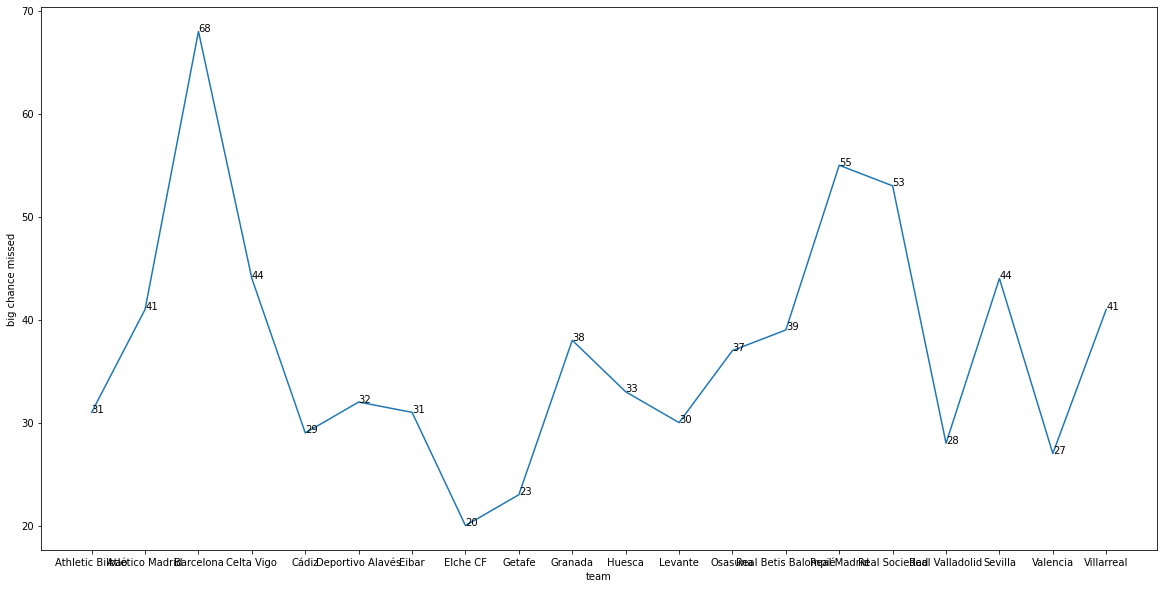

In [68]:
fig,ax=plt.subplots(figsize=(20,10))
sns.lineplot(x=chance_missed.index,y=chance_missed['big chance missed'],ax=ax)

for x in chance_missed.index:
    point_x=x
    point_y=chance_missed.loc[x,'big chance missed']
    text=str(chance_missed.loc[x,'big chance missed'])
    ax.annotate(xy=(point_x,point_y),xytext=(x,point_y),text=text)


You can observe that 'Barcelona' has missed most of their chances followed by 'Real Madrid'. So a question will arise that why they have missed so many chances?

It may be because they also happens to be creating most big chances. We can analyse that in the same graph. Lets see

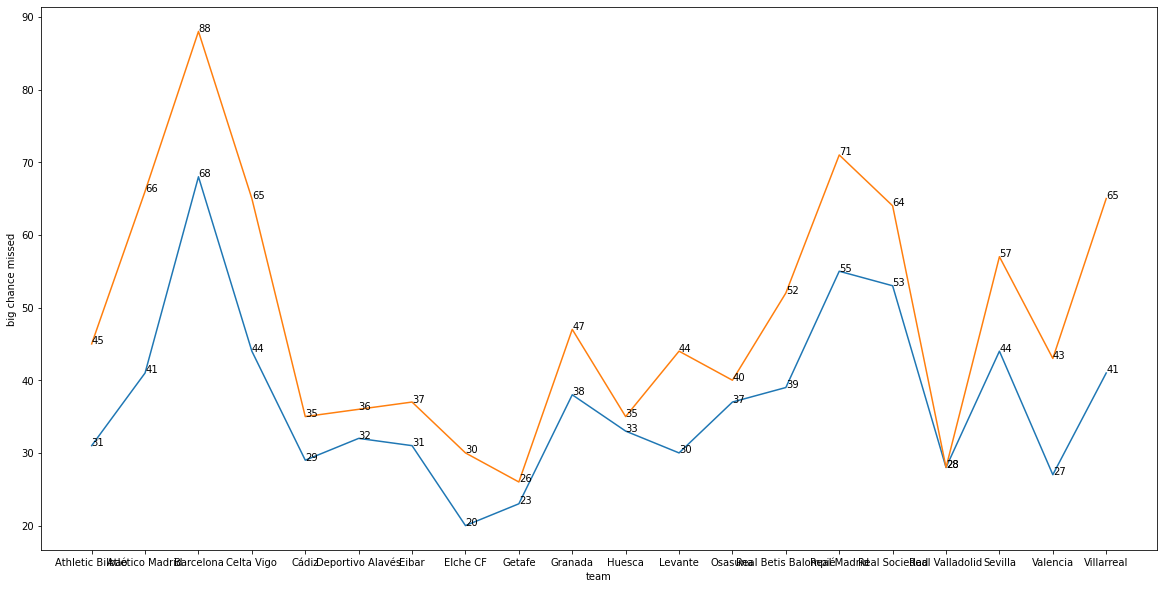

In [69]:

fig,ax=plt.subplots(figsize=(20,10))
sns.lineplot(x=chance_missed.index,y=chance_missed['big chance missed'],ax=ax)
sns.lineplot(x=chance_created.index,y=chance_created['big chance created'],ax=ax)

for x in chance_missed.index:
    point_x=x
    point_y=chance_missed.loc[x,'big chance missed']
    text=str(chance_missed.loc[x,'big chance missed'])
    ax.annotate(xy=(point_x,point_y),xytext=(x,point_y),text=text)
    
for x in chance_created.index:
    point_x=x
    point_y=chance_created.loc[x,'big chance created']
    text=str(chance_created.loc[x,'big chance created'])
    ax.annotate(xy=(point_x,point_y),xytext=(x,point_y),text=text)


My hypothesis got proved right. Both 'Real Madrid' and 'Barcelona' has produced higher number of chances.

Let's now calculate the percentage of the big chances missed by teams and which team has highest of it.

In [70]:
team_stats['bigchancecreated']=team_stats['big chance created']
team_stats['bigchancemissed']=team_stats['big chance missed']

team_stats.drop(['big chance created','big chance missed'],axis=1,inplace=True)

<AxesSubplot:xlabel='team', ylabel='percentagechancesmissed'>

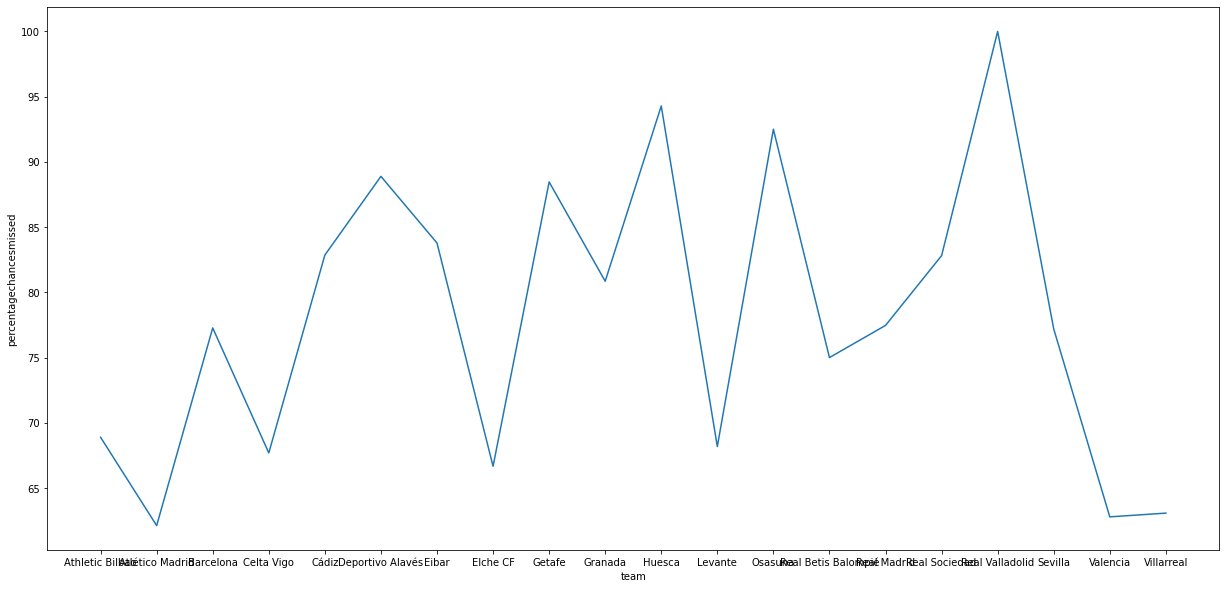

In [71]:
perc_chance_missed=team_stats.groupby('team').sum().eval('percentagechancesmissed = bigchancemissed/bigchancecreated*100')['percentagechancesmissed'].reset_index()

plt.figure(figsize=(21,10))
sns.lineplot(x=perc_chance_missed['team'],y=perc_chance_missed['percentagechancesmissed'])


#### Athletico has missed lowest percentage of big chances while Real Valladolid has missed all the big chances they created

#                                                   END OF NOTEBOOK